# General Public View
## Dataset info
- Name: Current Employee Names, Salaries, and Position Titles
- Source: City of Chicago Data Portal
- Access date: April 19, 2024
- Link: https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w/about_data
- Terms of use: https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html
    - Disclaimer: This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.
- Provided Description: This dataset is a listing of all active City of Chicago employees, complete with full names, departments, positions, employment status (part-time or full-time), frequency of hourly employee –where applicable—and annual salaries or hourly rate. Please note that "active" has a specific meaning for Human Resources purposes and will sometimes exclude employees on certain types of temporary leave. For hourly employees, the City is providing the hourly rate and frequency of hourly employees (40, 35, 20 and 10) to allow dataset users to estimate annual wages for hourly employees. Please note that annual wages will vary by employee, depending on number of hours worked and seasonal status. For information on the positions and related salaries detailed in the annual budgets, see https://www.cityofchicago.org/city/en/depts/obm.html
- Size: 2,721 KB

## Dataset characteristics
This dataset shows information about current employees of the City of Chicago. It contains 31,466 rows.

Fields:
- Name (string)
- Job Titles (string)
- Department (string)
- Full or Part-Time (string): "F" (full-time) or "P" (part-time)
- Salary or Hourly (string): "SALARY" or "HOURLY" 
- Typical Hours (int): 40, 35, 20, or 10 (only for hourly)
- Annual Salary (float): (only for salary)
- Hourly Rate (float): (only for hourly)

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up dataframe
df = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles_20240419.csv", index_col=None)

# Create column showing salary in thousands
df["Annual Salary (thousands)"] = df["Annual Salary"]/1000

df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Annual Salary (thousands)
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,34176.00,NaN,34.17600
1,"HARRISON, LETECHIA",SR PROCUREMENT SPECIALIST,DEPARTMENT OF PROCUREMENT SERVICES,F,SALARY,NaN,90660.00,NaN,90.66000
2,"GONZALEZ, MICHAEL A",POOL MOTOR TRUCK DRIVER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,45.98,NaN
3,"RAMIREZ, RODOLFO",SANITATION LABORER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,NaN,40.76,NaN
4,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,46056.00,NaN,46.05600
...,...,...,...,...,...,...,...,...,...
31461,"CALDERON, BRANDON J",FRM OF MACHINISTS - AUTOMOTIVE,DEPARTMENT OF FLEET AND FACILITY MANAGEMENT,F,HOURLY,40.0,NaN,59.74,NaN
31462,"AMBROSE, KEVIN J",FIREFIGHTER-EMT,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,102372.00,NaN,102.37200
31463,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.00,NaN,74.84400
31464,"SMITH, DORIS J",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.00,NaN


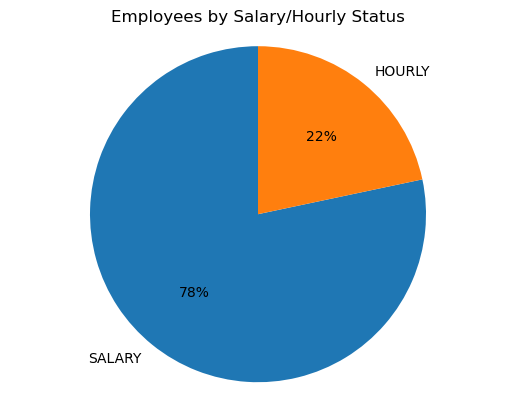

In [17]:
# Aggregate dataframe showing employee count of salaried vs hourly employees
df_sh = df.groupby("Salary or Hourly").size().to_frame("Employee Count").sort_values("Employee Count", ascending=False)

# Create pie chart
labels = df_sh.index
sizes = df_sh["Employee Count"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90)
ax1.axis('equal')
plt.title(label="Employees by Salary/Hourly Status")
plt.show()

C:\Users\qmcki\AppData\Local\Temp\ipykernel_10268\1735669019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpt_2.loc["OTHER"] = df_dpt.iloc[7:,:].sum()


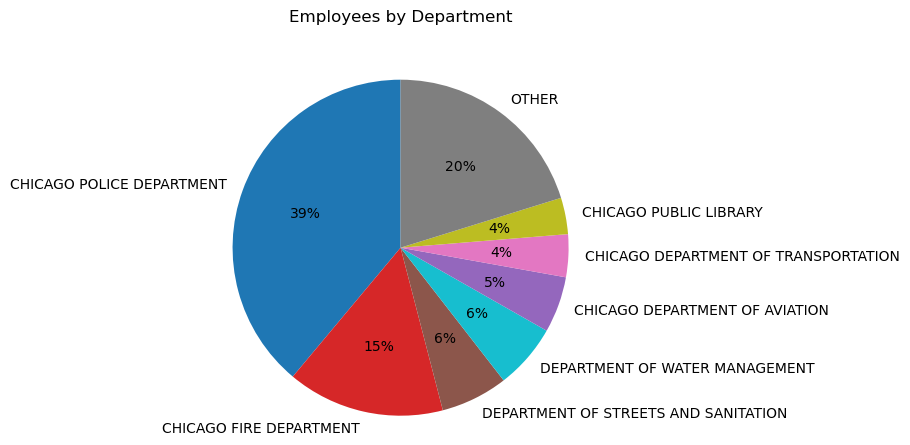

In [18]:
# Aggregate dataframe showing employee count per department
df_dpt = df.groupby("Department").size().to_frame("Employee Count").sort_values("Employee Count", ascending=False)

# Collapse smaller departments into "other" category
df_dpt_2 = df_dpt.iloc[0:7,:]
df_dpt_2.loc["OTHER"] = df_dpt.iloc[7:,:].sum()

# Create pie chart
labels = df_dpt_2.index
sizes = df_dpt_2["Employee Count"]
colors = ["tab:blue", "tab:red", "tab:brown", "tab:cyan", "tab:purple", "tab:pink", "tab:olive", "tab:gray"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title(label="Employees by Department", pad=30)
plt.show()

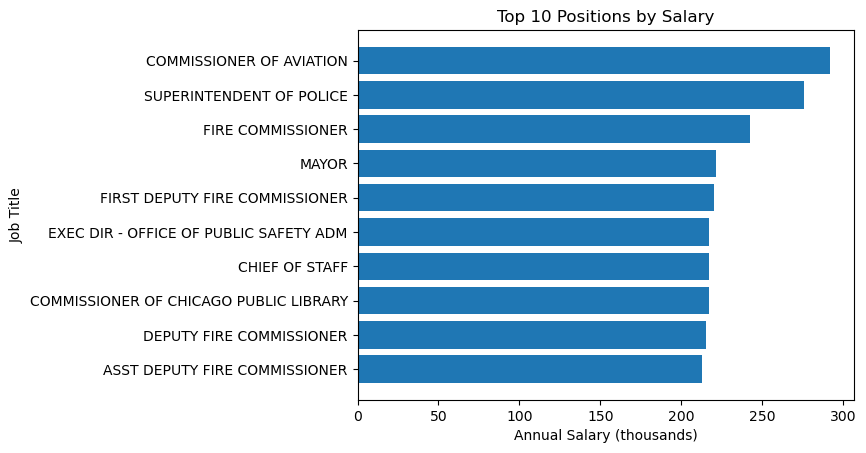

In [19]:
# Find top 10 positions by salary
df_salary = df.loc[df["Salary or Hourly"] == "SALARY"]
df_salary = df_salary.groupby("Job Titles").agg({"Annual Salary (thousands)": pd.Series.mean})
df_top_salary = df_salary.sort_values("Annual Salary (thousands)", ascending=False)[0:10]

# Create bar chart of top positions
plt.barh(df_top_salary.index, df_top_salary["Annual Salary (thousands)"])
plt.xlabel('Annual Salary (thousands)')
plt.ylabel('Job Title')
plt.title('Top 10 Positions by Salary')
plt.gca().invert_yaxis()
plt.show()